# Descrição do Projeto

Vamos analisar as avaliações, vendas em cada região, entender quais generos mais vendem em cada região e como podemos direcionar nossa estratégia a partir disso. 

## Carregando Dados


Importando Dataset e Bibliotecas. 

In [112]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 500)
import warnings
warnings.filterwarnings('ignore')
import math
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [113]:
import pandas as pd

games = pd.read_csv('/datasets/games.csv')

### Explorando Dados

In [114]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [115]:
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [116]:
games.tail()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


In [117]:
games['Name'].value_counts()

Need for Speed: Most Wanted           12
Madden NFL 07                          9
LEGO Marvel Super Heroes               9
Ratatouille                            9
FIFA 14                                9
                                      ..
Sentimental Graffiti 2                 1
Imagine: Teacher Class Trip            1
Wario: Master of Disguise              1
Dynasty Warriors 5: Xtreme Legends     1
Beyond the Labyrinth                   1
Name: Name, Length: 11559, dtype: int64

In [118]:
games['Name'].unique()

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Woody Woodpecker in Crazy Castle 5', 'LMA Manager 2007',
       'Haitaka no Psychedelica'], dtype=object)

In [119]:
games['Year_of_Release'].value_counts()

2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      62
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1987.0      16
1990.0      16
1988.0      15
1984.0      14
1985.0      14
1980.0       9
Name: Year_of_Release, dtype: int64

Previamente, analisando o Ano de lançamento, podemos notar um aumento nos lançamentos ao decorrer dos anos e isso é algo que ocorreu devido a mais lançamentos ao ano e aumento de mais plataformas de consoles e obviamente podemos expecular que as vendas exponecialmente aumentaram ao longo dos anos conforme a evolução dos consoles e jogos.  

In [120]:
games['Platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
GB        98
NES       98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Name: Platform, dtype: int64

In [121]:
games['Genre'].value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

Podemos analisar na coluna "Genre" que temos um alta demanda para jogos de 'action' e 'sports', será que eles tendem a ter mais vendas que os demais genêros? É algo que podemos analisar mais a frente.

In [122]:
games['Critic_Score'].value_counts()

70.0    256
71.0    254
75.0    245
78.0    240
73.0    238
       ... 
29.0      3
13.0      1
22.0      1
17.0      1
21.0      1
Name: Critic_Score, Length: 82, dtype: int64

In [123]:
games['User_Score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
0.6       2
0.5       2
1.3       2
9.7       1
0         1
Name: User_Score, Length: 96, dtype: int64

Em 'User_score' temos valores com 'TBD' vamos analisar se há algum padrão entre os jogos que estão com esse valor na coluna e entender e há algum motivo para não terem a nota preenchida. 

In [124]:
games['Rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: Rating, dtype: int64

## Preparando Dados

### Columns

Atualizando os nomes das colunas para que fiquem em letra minúcusla. 

In [125]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [126]:
new_column_names = {
    'Name': 'name',
    'Platform': 'platform',
    'Year_of_Release': 'year_of_release',
    'Genre': 'genre',
    'NA_sales': 'na_sales',
    'EU_sales': 'eu_sales',
    'JP_sales': 'jp_sales',
    'Other_sales': 'other_sales',
    'Critic_Score': 'critic_score',
    'User_Score': 'user_score',
    'Rating': 'rating'
}

games = games.rename(columns=new_column_names)

games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Agora temos os nomes de cada coluna sem letras maiúsculas. 

### Name

Na coluna 'name' vamos corrigir os nomes para que todos fique com letras minúsculas para que não haja erros no momento de somar as vendas de cada jogo. 

In [127]:
games['name'].value_counts()

Need for Speed: Most Wanted           12
Madden NFL 07                          9
LEGO Marvel Super Heroes               9
Ratatouille                            9
FIFA 14                                9
                                      ..
Sentimental Graffiti 2                 1
Imagine: Teacher Class Trip            1
Wario: Master of Disguise              1
Dynasty Warriors 5: Xtreme Legends     1
Beyond the Labyrinth                   1
Name: name, Length: 11559, dtype: int64

In [128]:
games['name'] = games['name'].str.lower()

games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,super mario bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,wii sports resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,pokemon red/pokemon blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,lma manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,haitaka no psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,spirits & spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [129]:
games['name'].unique()

array(['wii sports', 'super mario bros.', 'mario kart wii', ...,
       'woody woodpecker in crazy castle 5', 'lma manager 2007',
       'haitaka no psychedelica'], dtype=object)

In [130]:
games['name'].isnull().sum()

2

Temos dois jogos com o nome ausentes na coluna 'name' e como este é um dado que não temos paramêtros para preencher. Então, vamos remover essas duas linhas. 

In [131]:
games = games.dropna(subset=['name'])

games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


### Platform

A coluna 'platform' parece estar boa, porém vamos alterar os dados para que todos fiquem em letras minúsculas, um ponto muito bom é que não há valores com nomes diferentes como por exemplo "PS2" e "PlayStation 2" então não será necessário o mapeamento dos valores ou maiores correções.

In [132]:
games['platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
GB        98
NES       98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Name: platform, dtype: int64

In [133]:
games['platform'] = games['platform'].str.lower()

games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,super mario bros.,nes,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,wii sports resort,wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,pokemon red/pokemon blue,gb,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,ps3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,lma manager 2007,x360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,haitaka no psychedelica,psv,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,spirits & spells,gba,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [134]:
games['platform'].isnull().sum()

0

Não temos valores ausentes na coluna "platform". 

### Year of Release

Analisando a coluna "year_of_release"

In [135]:
games['year_of_release'].value_counts()

2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1987.0      16
1990.0      16
1988.0      15
1984.0      14
1985.0      14
1980.0       9
Name: year_of_release, dtype: int64

In [136]:
games['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

Temos valores ausentes nesta coluna que precisam ser preenchidos, vamos analisar as linhas com valores ausentes para identificar se há algum padrão. 

In [137]:
filtro_valores_ausentes = games['year_of_release'].isnull()

ausentes = games[filtro_valores_ausentes]

ausentes.head(50)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,madden nfl 2004,ps2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,fifa soccer 2004,ps2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,lego batman: the videogame,wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe smackdown vs. raw 2006,ps2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,space invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,rock band,x360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,frogger's adventures: temple of the frog,gba,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
678,lego indiana jones: the original adventures,wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
719,call of duty 3,wii,NaN,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T
805,rock band,wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T


Analisando as linhas com o ano de lançamento ausente, vemos que não são jogos novos ou que serão lançados e sim valores ausentes por falta de informação ou de preenchimento das informações, alguns jogos podem ser corrigidos de acordo com seu próprio nome que em alguns constam o ano de referência do jogo, em alguns casos não é o ano exato mas por estar no nome podemos sim considerá-los para preencher seu ano de lançamento. Já em outros jogos podemos preencher 

In [138]:
porcentagem_ausentes = (games['year_of_release'].isnull().sum() / len(games)) * 100
porcentagem_ausentes

1.6095255190570215

Os valores ausentes representam 1,60% dos dados, não é uma quantidade alta mas podemos reduzir esta porcentagem antes de pensar em remover valores. 

In [139]:
import pandas as pd
import re

def extract_year_from_name(name):
    year_pattern = r'\b(19\d{2}|20\d{2})\b' 
    match = re.search(year_pattern, name)
    if match:
        return int(match.group())
    else:
        return None

years = ausentes[ausentes['name'].str.contains(r'\b(19\d{2}|20\d{2})\b', na=False, case=False)]
years

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,madden nfl 2004,ps2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,fifa soccer 2004,ps2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
475,wwe smackdown vs. raw 2006,ps2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
1650,nascar thunder 2003,ps2,NaN,Racing,0.60,0.46,0.00,0.16,84.0,8.7,E
2572,pes 2009: pro evolution soccer,psp,NaN,Sports,0.04,0.33,0.26,0.17,NaN,NaN,NaN
3486,madden nfl 2002,xb,NaN,Sports,0.53,0.02,0.00,0.03,90.0,8.1,E
4775,nfl gameday 2003,ps2,NaN,Sports,0.20,0.15,0.00,0.05,60.0,tbd,E
5156,nba live 2003,xb,NaN,Sports,0.31,0.04,0.00,0.01,82.0,8.8,E
5336,tomb raider (2013),pc,NaN,Action,0.06,0.25,0.00,0.04,86.0,8.5,M
5655,all-star baseball 2005,ps2,NaN,Sports,0.16,0.12,0.00,0.04,72.0,8.6,E


Realizando esse novo filtro com as linhas que tem o ano no nome com 4 digitos pois com 2 não será possível aplicar este metodo então tentaremos outra alternativa. 

In [140]:
games.loc[years.index, 'year_of_release'] = years['name'].apply(extract_year_from_name)

games['year_of_release'].isnull().sum()

252

In [141]:
games['year_of_release'].value_counts()

2008.0    1429
2009.0    1427
2010.0    1255
2007.0    1198
2011.0    1137
2006.0    1008
2005.0     941
2002.0     830
2003.0     779
2004.0     764
2012.0     653
2015.0     606
2014.0     581
2013.0     545
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1987.0      16
1990.0      16
1988.0      15
1984.0      14
1985.0      14
1980.0       9
Name: year_of_release, dtype: int64

In [142]:
ausentes = (games['year_of_release'].isnull().sum() / len(games)) * 100
ausentes

1.5078082929456111

Inserimos os anos nos jogos que havia o ano com 4 digitos em seu nome, porém ainda temos 252 linhas com valores ausentes, como é uma parcela baixa de 1,50% do tamanho da nossa base de dados vamos excluir este dados pois não causará grande impacto em nossas analises.

In [143]:
games = games.dropna(subset=['year_of_release'])

games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16461 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16461 non-null  object 
 1   platform         16461 non-null  object 
 2   year_of_release  16461 non-null  float64
 3   genre            16461 non-null  object 
 4   na_sales         16461 non-null  float64
 5   eu_sales         16461 non-null  float64
 6   jp_sales         16461 non-null  float64
 7   other_sales      16461 non-null  float64
 8   critic_score     7995 non-null   float64
 9   user_score       9851 non-null   object 
 10  rating           9779 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


### Genre


In [144]:
games['genre'].value_counts()

Action          3308
Sports          2318
Misc            1721
Role-Playing    1481
Shooter         1296
Adventure       1293
Racing          1229
Platform         878
Simulation       857
Fighting         838
Strategy         673
Puzzle           569
Name: genre, dtype: int64

In [145]:
games['genre'].isnull().sum()

0

### NA Sales

In [146]:
games['na_sales'].value_counts()

0.00     4452
0.02      562
0.03      554
0.04      544
0.05      536
         ... 
4.40        1
4.12        1
8.92        1
13.96       1
5.05        1
Name: na_sales, Length: 402, dtype: int64

In [147]:
games['na_sales'].isnull().sum()

0

Na coluna 'na_sales' temos muitos jogos com a venda em 0.00 mas não são valores ausentes então não há necessidade de retirar ou removê-los pois em outras colunas eles podem ter valores de vendas e perder suas linhas pode atrapalhar em nossa análise. 

### EU Sales

In [148]:
games['eu_sales'].value_counts()

0.00    5769
0.01    1468
0.02    1291
0.03     912
0.04     704
        ... 
9.14       1
1.92       1
3.86       1
2.59       1
3.87       1
Name: eu_sales, Length: 307, dtype: int64

Na coluna 'eusales' temos também uma grande quantidade de jogos sem vendas nesta região.

In [149]:
games['eu_sales'].isnull().sum()

0

### JP sales

In [150]:
games['jp_sales'].value_counts()

0.00    10313
0.02      733
0.01      698
0.03      540
0.04      393
        ...  
3.84        1
1.17        1
3.03        1
2.66        1
1.71        1
Name: jp_sales, Length: 244, dtype: int64

In [151]:
games['jp_sales'].isnull().sum()

0

Na coluna 'jp_sales' temos a maior quantidade de jogos sem vendas. 

### Other Sales

In [152]:
games['other_sales'].value_counts()

0.00    6496
0.01    3402
0.02    1596
0.03     911
0.04     643
        ... 
0.72       1
2.11       1
0.96       1
1.48       1
3.96       1
Name: other_sales, Length: 155, dtype: int64

In [153]:
games['other_sales'].isnull().sum()

0

Todas as colunas com as regiões de vendas contém uma quantidade signitivamente alta de jogos sem vendas, podemos definir como algo normal pois nem todos os jogos são vendidos em todas as regiões e pode ter mercados mais direcionados para regiões especificas, mas também podemos ter erros de preenchimento dos dados e alguns jogos ficaram sem vendas contabilizadas por conta disso. Podemos tentar remover somente as linhas que não há nenhum registro de venda e depois tentar outra alternativa de remoção se necessário. 

### Critic Score

Analisando a coluna 'critic_score' 

In [154]:
games['critic_score'].value_counts()

70.0    252
71.0    248
75.0    241
80.0    235
73.0    234
       ... 
29.0      3
20.0      3
13.0      1
17.0      1
21.0      1
Name: critic_score, Length: 81, dtype: int64

In [155]:
games['critic_score'].isnull().sum()

8466

Temos uma alta quantidade de valores ausentes nesta coluna, para resolver isto, vamos preencher com a mediana pelo gênero de cada jogo que é um dado que está completo e que pode nos dar um valor aceitável. 

In [156]:
games['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [157]:
filtro_critic = games['critic_score'].isnull()

critic = games[filtro_critic]

critic.head(50)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,super mario bros.,nes,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,pokemon red/pokemon blue,gb,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,tetris,gb,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,duck hunt,nes,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,nintendogs,ds,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
12,pokemon gold/pokemon silver,gb,1999.0,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN
18,super mario world,snes,1990.0,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN
20,pokemon diamond/pokemon pearl,ds,2006.0,Role-Playing,6.38,4.46,6.04,1.36,NaN,NaN,NaN
21,super mario land,gb,1989.0,Platform,10.83,2.71,4.18,0.42,NaN,NaN,NaN
22,super mario bros. 3,nes,1988.0,Platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN


In [158]:
median_scores_by_genre = games.groupby('genre')['critic_score'].median()

median_scores_by_genre

genre
Action          68.0
Adventure       66.0
Fighting        72.0
Misc            69.0
Platform        69.5
Puzzle          70.0
Racing          69.0
Role-Playing    74.0
Shooter         73.0
Simulation      70.0
Sports          75.0
Strategy        73.0
Name: critic_score, dtype: float64

In [159]:
games['critic_score'] = games.apply(
    lambda row: median_scores_by_genre[row['genre']] if pd.isnull(row['critic_score']) else row['critic_score'],
    axis=1
)

Preenchemos os valores ausentes com a mediana de acordo com o gênero de cada jogo. 

In [160]:
games['critic_score'].describe()

count    16461.000000
mean        69.705607
std          9.948025
min         13.000000
25%         67.000000
50%         70.000000
75%         75.000000
max         98.000000
Name: critic_score, dtype: float64

### User Score

In [161]:
games['user_score'].value_counts()

tbd    2378
7.8     322
8       285
8.2     277
8.3     252
       ... 
0.6       2
0.5       2
1.3       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

In [162]:
games['user_score'].isnull().sum()

6610

Na coluna 'user_score' temos uma grande quantidade de dados preenchidos com 'tbd' além de valores ausentes, vamos fazer este processo da seguinte maneira: Vamos tornar as linhas em 'tbd' em valores ausentes e após isso preencher com o mesmo critério com a coluna 'critic_score' onde preenchemos com a mediana de acordo com o gênero de cada jogo.

In [163]:
games['user_score'] = games['user_score'].replace('tbd', np.nan)
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')
games['user_score'].isnull().sum()

8988

In [164]:
games['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

In [165]:
median_user_score = games.groupby('genre')['user_score'].median()

median_user_score

genre
Action          7.4
Adventure       7.6
Fighting        7.6
Misc            7.1
Platform        7.7
Puzzle          7.5
Racing          7.4
Role-Playing    7.8
Shooter         7.4
Simulation      7.5
Sports          7.4
Strategy        7.8
Name: user_score, dtype: float64

In [166]:
games['user_score'] = games.apply(
    lambda row: median_user_score[row['genre']] if pd.isnull(row['user_score']) else row['user_score'],
    axis=1
)
games['user_score'].isnull().sum()

0

In [167]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16461 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16461 non-null  object 
 1   platform         16461 non-null  object 
 2   year_of_release  16461 non-null  float64
 3   genre            16461 non-null  object 
 4   na_sales         16461 non-null  float64
 5   eu_sales         16461 non-null  float64
 6   jp_sales         16461 non-null  float64
 7   other_sales      16461 non-null  float64
 8   critic_score     16461 non-null  float64
 9   user_score       16461 non-null  float64
 10  rating           9779 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


In [168]:
games['user_score'].describe()

count    16461.000000
mean         7.311488
std          1.034665
min          0.000000
25%          7.100000
50%          7.400000
75%          7.800000
max          9.700000
Name: user_score, dtype: float64

In [169]:
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')

Agora temos toda a coluna 'user_score' preenchida com a mediana de acordo com o gênero do jogo. 

### Rating

In [170]:
games['rating'].value_counts()

E       3930
T       2905
M       1537
E10+    1394
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64

Como não temos informações suficientes para preencher está coluna, vamos inserir os valores ausentes como RP (Rating Pending). 

In [171]:
games['rating'].fillna('RP', inplace=True)

games.info()
games['rating'].value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16461 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16461 non-null  object 
 1   platform         16461 non-null  object 
 2   year_of_release  16461 non-null  float64
 3   genre            16461 non-null  object 
 4   na_sales         16461 non-null  float64
 5   eu_sales         16461 non-null  float64
 6   jp_sales         16461 non-null  float64
 7   other_sales      16461 non-null  float64
 8   critic_score     16461 non-null  float64
 9   user_score       16461 non-null  float64
 10  rating           16461 non-null  object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


RP      6683
E       3930
T       2905
M       1537
E10+    1394
EC         8
K-A        3
AO         1
Name: rating, dtype: int64

Nosso último tópico na preparação dos dados será em tratar as duplicatas, como oviamente teremos linhas iguais por motivos óbvio, como nomes de jogos iguais, plataformas de jogos iguais e entre outros, vamos aplicar em todo o data frame para localizar duplicatas em todas as colunas e não somente em colunas especificos ou uma a uma. 

In [172]:
duplicates = games[games.duplicated(keep=False)]
duplicates.sum()

name               0.0
platform           0.0
year_of_release    0.0
genre              0.0
na_sales           0.0
eu_sales           0.0
jp_sales           0.0
other_sales        0.0
critic_score       0.0
user_score         0.0
rating             0.0
dtype: float64

Não temos duplicatas em nosso dataframe e podemos prosseguir com nossa análise. 

### Criando Nova Coluna

Vamos criar a coluna 'wrl_sales' com a contagem total de vendas em todas as regiões do mundo. 

In [173]:
games['wrl_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,wrl_sales
0,wii sports,wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,super mario bros.,nes,1985.0,Platform,29.08,3.58,6.81,0.77,69.5,7.7,RP,40.24
2,mario kart wii,wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,wii sports resort,wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,pokemon red/pokemon blue,gb,1996.0,Role-Playing,11.27,8.89,10.22,1.00,74.0,7.8,RP,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,ps3,2016.0,Action,0.00,0.00,0.01,0.00,68.0,7.4,RP,0.01
16711,lma manager 2007,x360,2006.0,Sports,0.00,0.01,0.00,0.00,75.0,7.4,RP,0.01
16712,haitaka no psychedelica,psv,2016.0,Adventure,0.00,0.00,0.01,0.00,66.0,7.6,RP,0.01
16713,spirits & spells,gba,2003.0,Platform,0.01,0.00,0.00,0.00,69.5,7.7,RP,0.01


## Analisando Dados

### Analisando os lançamentos ao decorrer dos anos

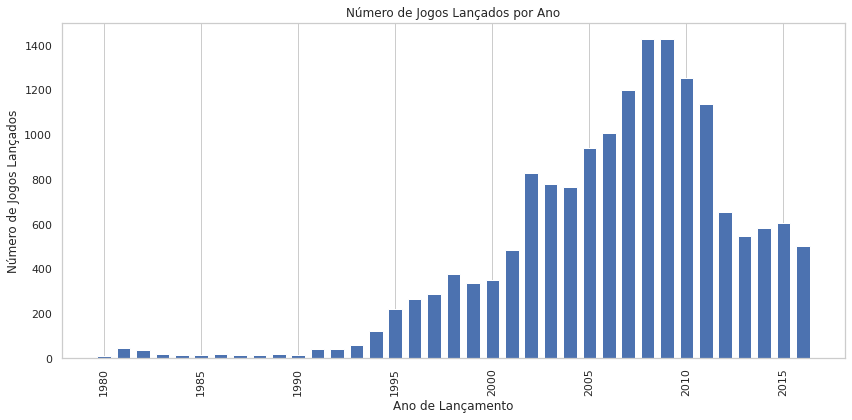

In [174]:
import matplotlib.pyplot as plt

games_by_year = games['year_of_release'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.bar(games_by_year.index, games_by_year.values, width=0.7)
plt.xlabel('Ano de Lançamento')
plt.ylabel('Número de Jogos Lançados')
plt.title('Número de Jogos Lançados por Ano')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

Analisando os lançamentos ano a ano, podemos analisar alguns pontos interessantes:
A indústria de videogames estava em sua infância durante a década de 80 com um número de jogos lançados relativamente baixo em comparação com as décadas seguintes. Houve um aumento constante no número de jogos lançados durante a década de 1990, com um crescimento significativo a partir da metade da década. Isso pode ser atribuído ao crescimento da popularidade dos consoles e ao amadurecimento da indústria.

A virada dos anos 2000 trouxe um aumento acentuado no lançamento de jogos, atingindo um pico em 2008 e 2009. Isso pode estar relacionado ao lançamento de consoles de próxima geração, como o Xbox 360, PlayStation 3 e Wii. Embora ainda tenha havido um número significativo de lançamentos, parece haver uma tendência de queda após 2010, e isso pode ser devido à saturação do mercado e ao aumento dos custos de desenvolvimento.

É importante notar que os dados refletem a quantidade de jogos lançados a cada ano, mas não necessariamente a qualidade ou o sucesso desses jogos. Além disso, mudanças na indústria, como o crescimento dos jogos móveis e o surgimento de novas plataformas, também podem afetar a dinâmica dos lançamentos ao longo do tempo.






### Top 5 Plataformas

Vamos analisar 5 plataformas com mais vendas e analisar seus valores totais e suas distribuições de vendas ao decorrer dos anos. 

In [175]:
platform = games.groupby('platform')['wrl_sales'].sum().sort_values(ascending=False)
top_platforms = platform.nlargest(5)
top_platforms

platform
ps2     1247.28
x360     961.30
ps3      931.34
wii      891.18
ds       802.79
Name: wrl_sales, dtype: float64

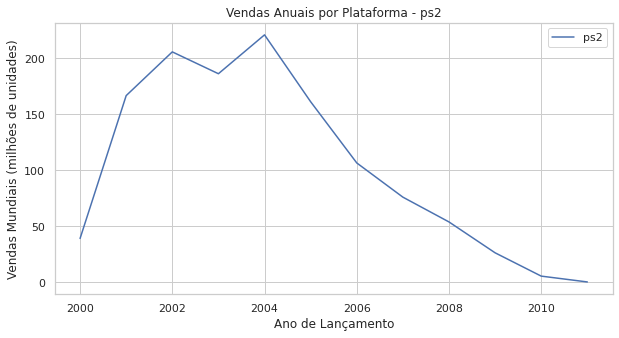

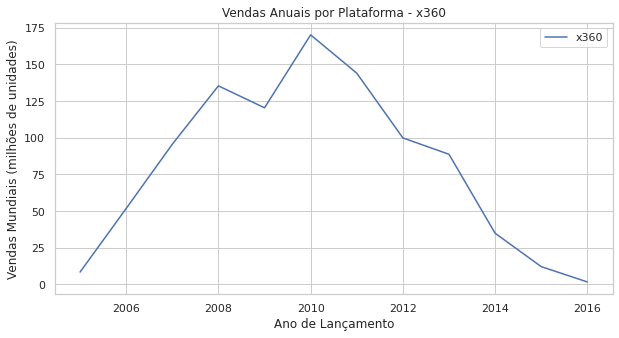

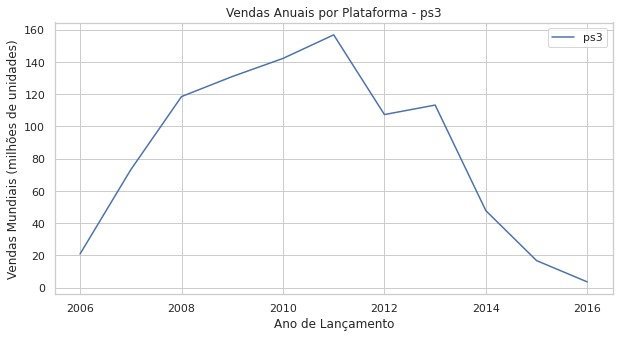

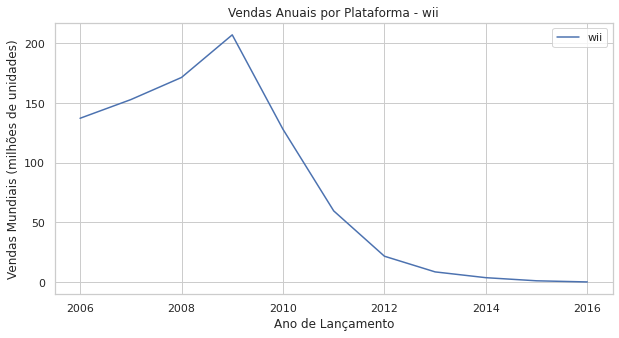

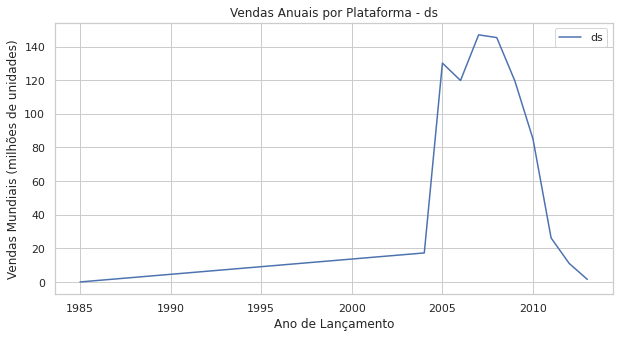

In [176]:
for platform in top_platforms.index:
    platform_data = games[games['platform'] == platform]
    yearly_sales = platform_data.groupby('year_of_release')['wrl_sales'].sum()
    
    plt.figure(figsize=(10, 5))
    plt.plot(yearly_sales.index, yearly_sales.values, label=platform)
    plt.title(f'Vendas Anuais por Plataforma - {platform}')
    plt.xlabel('Ano de Lançamento')
    plt.ylabel('Vendas Mundiais (milhões de unidades)')
    plt.legend()
    plt.grid(True)
    plt.show()

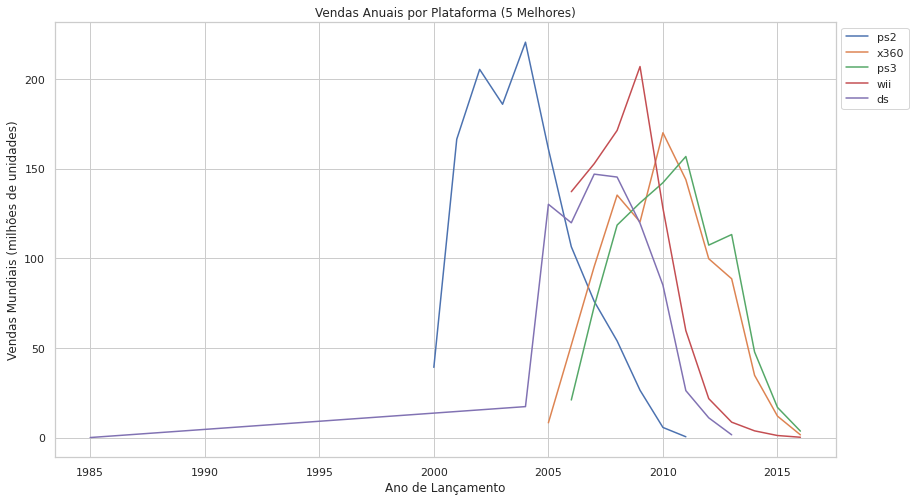

In [177]:
plt.figure(figsize=(14, 8))

for platform in top_platforms.index:
    platform_data = games[games['platform'] == platform]
    yearly_sales = platform_data.groupby('year_of_release')['wrl_sales'].sum()
    
    plt.plot(yearly_sales.index, yearly_sales.values, label=platform)

plt.title('Vendas Anuais por Plataforma (5 Melhores)')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Vendas Mundiais (milhões de unidades)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

Podemos analisar que as 5 principais plataformas tiveram seu grande auge após os anos 2000, o PS2 foi o que se destacou antes dos outros e teve o maior pico de vendas e também sustenta o posto de mais vendas no geral entre todas as plataformas, o Wii teve seu lançamento e auge entre 2006 e 2010 e depois sofreu uma que livre assim como o PS2, o DS é o mais longevo tendo sido lançado em 1985 porém somente após 2005 teve numeros expressivos e chegou aos seus melhores anos e podemos dizer que teve também um auge mais longo que os outros dois Wii e PS2, mas já em meados de 2013 teve seus lançamentos a 0 vendas a partir dali. As outras duas plataformas são X360 e PS3 que foram lançados em 2005 e 2006 respectivamente são as duas unicas plataformas que ainda estão com numeros relevantes atualmente apesar de serem numeros baixos não são quase zero, e que diferentemente das outras que tiveram seus auges entre 2005 e 2010 elas tiveram sim vendas relevantes neste mesmo periodo porém continuaram tendo após 2010 numeros expressivos, sendo as duas plataformas com mais vendas entre as 5 maiores.


#### Surgimento de novas Plataformas

In [178]:
platform_years = games.groupby('platform')['year_of_release'].agg(['min', 'max']).reset_index()
platform_years.columns = ['platform', 'first_year', 'last_year']
recent_platforms = platform_years[platform_years['first_year'] >= 2010]
recent_platforms

,platform,first_year,last_year
2,3ds,2011.0,2016.0
18,ps4,2013.0,2016.0
20,psv,2011.0,2016.0
26,wiiu,2012.0,2016.0
30,xone,2013.0,2016.0


Tivemos somente 5 plataformas lançadas após 2010 que é um numero baixo quando se imagina uma expansão de plataformas e jogos ao decorrer dos anos porém o que podemos ver é um certo monopólio de alguns projetos bem sucedidos no passado que continuaram sendo lançados com plataformas mais modernas. 

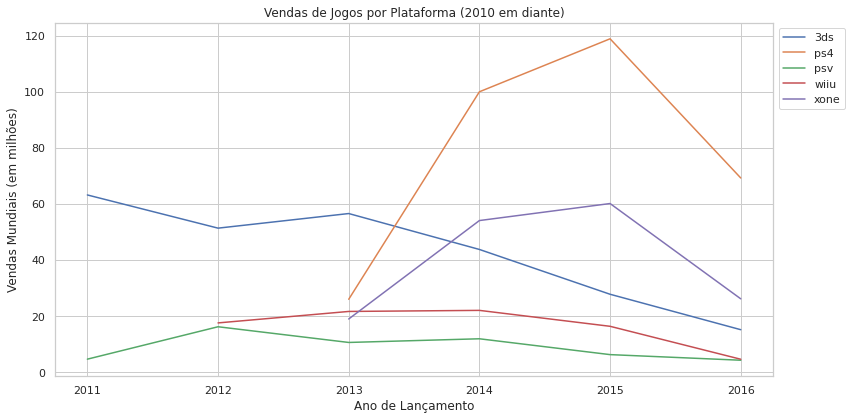

In [179]:
platform_sales = games.groupby(['platform', 'year_of_release'])['wrl_sales'].sum().reset_index()
recent_platform_sales = platform_sales[platform_sales['platform'].isin(recent_platforms['platform'])]

plt.figure(figsize=(12, 6))
for platform in recent_platforms['platform']:
    platform_data = recent_platform_sales[recent_platform_sales['platform'] == platform]
    plt.plot(platform_data['year_of_release'], platform_data['wrl_sales'], label=platform)

plt.title('Vendas de Jogos por Plataforma (2010 em diante)')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Vendas Mundiais (em milhões)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

Analisando as vendas das novas plataformas vemos que somente o ps4 ultrapassou a marca de 100 milhões de vendas anuais, enquanto 3ds e xone chegaram na faixa de 60 milhões apenas.

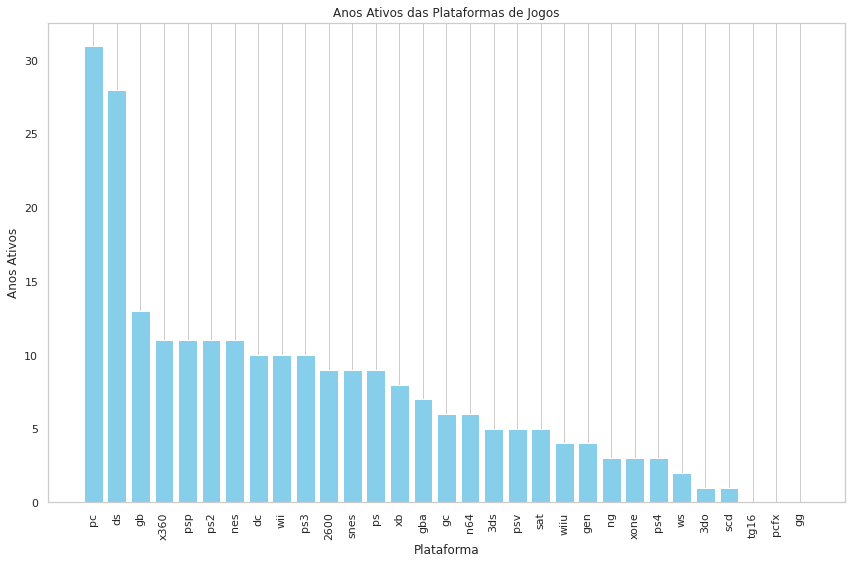

In [180]:
platform_years['years_active'] = platform_years['last_year'] - platform_years['first_year']

platform_years = platform_years.sort_values(by='years_active', ascending=False)

plt.figure(figsize=(12, 8))
plt.bar(platform_years['platform'], platform_years['years_active'], color='skyblue')
plt.title('Anos Ativos das Plataformas de Jogos')
plt.xlabel('Plataforma')
plt.ylabel('Anos Ativos')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [181]:
platform_years.mean()

first_year      1997.645161
last_year       2005.258065
years_active       7.612903
dtype: float64

Em média as plataformas fiquem em média cerca de 7 anos com lançamentos ativos e logo após surgem novas plataformas com novos lançamentos. 

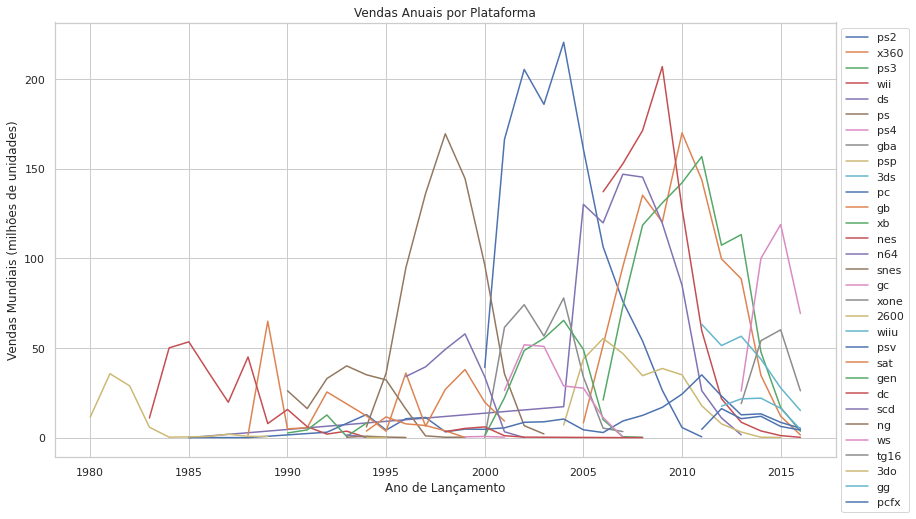

In [182]:
all_platform = games.groupby('platform')['wrl_sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(14, 8))

for platform in all_platform.index:
    platform_data = games[games['platform'] == platform]
    all_sales = platform_data.groupby('year_of_release')['wrl_sales'].sum()
    
    plt.plot(all_sales.index, all_sales.values, label=platform)

plt.title('Vendas Anuais por Plataforma')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Vendas Mundiais (milhões de unidades)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

Neste gráfico podemos notar também que em média o auge das plataformas duram cerca de 4 a 7 anos no máximo e logo após surgem novas plataformas com uma nova gama de jogos, podemos notar um aumento exponencial ao longo dos anos porém por este gráfico fica claro que tivemos uma queda após 2010 que pode estar relacionada a diversos fatores mas um que podemos medir é a quantidade de lançamentos após 2010 em comparação com os anos anterior para notar se isso resultou em um valor menor de vendas.

Entre 5 a 7 anos há novas plataformas sendo lançadas e em média as plataformas antigas desaparecem entre 9 a 11 anos após seu lançamento. 

### Constrindo um modelo para 2017

Para determinar um modelo para 2017, vamos selecionar as plataformas lançadas a partir de 2017 pois são elas que ainda tem lançamentos anuais até 2016 e que consequentemente ainda lançaram jogos até que outras plataformas seja lançadas. 

In [183]:
new_games = games[(games['year_of_release'] >= 2010)]

new_games.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5279 entries, 14 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             5279 non-null   object 
 1   platform         5279 non-null   object 
 2   year_of_release  5279 non-null   float64
 3   genre            5279 non-null   object 
 4   na_sales         5279 non-null   float64
 5   eu_sales         5279 non-null   float64
 6   jp_sales         5279 non-null   float64
 7   other_sales      5279 non-null   float64
 8   critic_score     5279 non-null   float64
 9   user_score       5279 non-null   float64
 10  rating           5279 non-null   object 
 11  wrl_sales        5279 non-null   float64
dtypes: float64(8), object(4)
memory usage: 536.1+ KB


Inserimos os dados de 2010 em diante em um novo dataframe.

In [184]:
new_platform = new_games.groupby(['platform', 'year_of_release'])['wrl_sales'].sum().reset_index()
new_platform = new_platform.sort_values(by= 'wrl_sales', ascending=False)


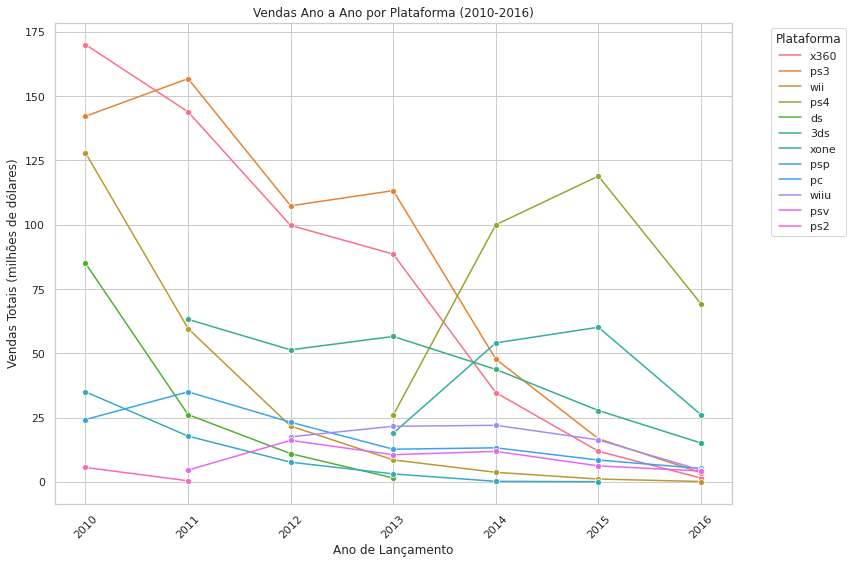

In [185]:
plt.figure(figsize=(12, 8))
sns.set_palette("husl")
sns.set_style("whitegrid")

g = sns.lineplot(data=new_platform, x='year_of_release', y='wrl_sales', hue='platform', marker='o')

plt.title('Vendas Ano a Ano por Plataforma (2010-2016)')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Vendas Totais (milhões de dólares)')
plt.legend(title='Plataforma', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Por este gráfico podemos analisar a queda ao longo dos anos de x360, ps3, wii e ds, e também ver o surgimento das novas plataformas  xone, ps4 e wiiu justamente as plataformas modernas das que tiveram grande impacto entre 2005 e 2010. Porém temos um cenário um pouco diferente em comparação com o que ocorreu com as plataformas antigas. 

Analisando as principais novas plataformas xone, ps4, wiiu e 3ds podemos temos um impacto de vendas signitivamente inferior ao volume que houve entre 2005 e 2010 e temos um domínio do ps4 em compraração as outras 3 plataformas chegando a atingir um pico de 118.90 milhões de vendas em 2015, enquanto wiiu não atingiu sequer 25 milhôes, 3ds atingiu um pico de 63.20 milhões em seu ano de lançamento (2011) e xone atingiu um pico de 60.14 milhões em 2015, numeros que são inferiores até com os anos entre 2010 a 2012 de ps3 e x360 onde já estavam em seu declínio.

Agora, pensando sobre o que pode acontecer com as novas plataformas, podemos enxergar um certo domínio do ps4 em relação as outras plataformas e xone sendo a segunda mais relevante em vendas, wiiu e 3ds estão relativamente em uma tendência de queda e provavelmente não terão vendas acima dos 25 milhões nos próximos anos, então podemos ter ps4 e xone sendo as plataformas com mais vendas mesmo tendo uma queda entre 2015 e 2016. 


### Vendas Globais de Jogos

Analisandos as vendas globais de todas as plataformas

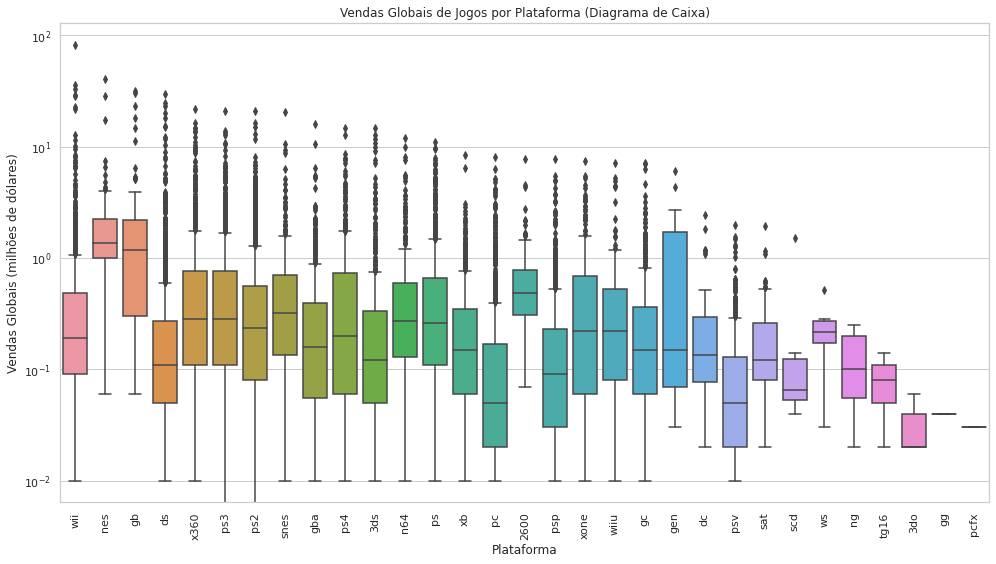

In [186]:
sns.set(style="whitegrid")
plt.figure(figsize=(14, 8))
sns.boxplot(data=games, x='platform', y='wrl_sales')
plt.yscale('log') 

plt.xlabel('Plataforma')
plt.ylabel('Vendas Globais (milhões de dólares)')
plt.title('Vendas Globais de Jogos por Plataforma (Diagrama de Caixa)')

plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [187]:
all_sales = games.groupby(['platform'])['wrl_sales'].sum()
all_sales = all_sales.sort_values(ascending=False)
all_sales

platform
ps2     1247.28
x360     961.30
ps3      931.34
wii      891.18
ds       802.79
ps       727.58
ps4      314.14
gba      312.88
psp      290.34
3ds      257.81
pc       256.11
gb       254.43
xb       252.66
nes      251.05
n64      218.01
snes     200.04
gc       197.03
xone     159.32
2600      86.48
wiiu      82.19
psv       53.81
sat       33.59
gen       28.35
dc        15.95
scd        1.86
ng         1.44
ws         1.42
tg16       0.16
3do        0.10
gg         0.04
pcfx       0.03
Name: wrl_sales, dtype: float64

As diferenças nas vendas entre as plataformas são significativas. Podemos observar que algumas plataformas têm vendas muito maiores do que outras, as três principais plataformas com as maiores vendas globais são PS2 com vendas globais de cerca de 1247,28 milhões, x360 com vendas globais de cerca de 961,30 milhões e ps3 com vendas globais de cerca de 931,34 milhões.

In [188]:
games_per_platform = games.groupby('platform')['name'].count().reset_index()
games_per_platform.columns = ['platform', 'num_of_games']

average_sales_per_platform = games.groupby('platform')['wrl_sales'].mean().reset_index()
average_sales_per_platform.columns = ['platform', 'average_sales']

platform_stats = pd.merge(games_per_platform, average_sales_per_platform, on='platform')

platform_stats = platform_stats.sort_values(by='average_sales', ascending=False)

platform_stats

,platform,num_of_games,average_sales
5,gb,97,2.622990
11,nes,98,2.561735
8,gen,27,1.050000
23,snes,239,0.836987
18,ps4,392,0.801378
28,x360,1234,0.779011
0,2600,116,0.745517
17,ps3,1306,0.713124
25,wii,1286,0.692986
10,n64,316,0.689905


Na média de vendas pela quantidade de jogos lançados em cada plataforma ao decorrer do seu tempo em atividade, temos na 3 melhores médias plataformas que não estão entre as que mais venderam gb, nes e gen que lançaram menos de 100 jogos e no caso da plataforma gen foram lançados somente 27 jogos que são numeros muito inferior aos 2134 do ps2, 1234 do x360 e 1306 do ps3. Um ponto importante para deixar claro sobre essa diferença na média de vendas por jogo e quantidade de lançamento em cada plataforma temos que levar em consideração que gb, nes e gen são plataformas antigas e que em sua época não havia uma alta tecnologia para que houvessem mais lançamentos e que automaticamente seus consumidores na época jogavam em tese jogos iguais devido a pouca variedade de jogo que haviam disponíveis, e do outro lado ps2, ps3 e x360 são plataformas mais modernas e que possibilitou uma quantidade imensa de lançamentos e variedades de jogos, que também reduz a assertividade e sucesso de seus lançamentos tendo muitos jogos com vendas baixas ou sem praticamente nenhuma venda. 

### Impacto da Aváliação da Crítica e dos Usuários

#### Impacto da Crítica

Vamos analisar o impacto e a correlação da avaliação da crítica com a quantidade de vendas dos jogos.

In [189]:
correlation_critic = games['critic_score'].corr(games['wrl_sales'])
print("Correlação entre a avaliação crítica e as Vendas:", correlation_critic)

Correlação entre a avaliação crítica e as Vendas: 0.1964695360152658


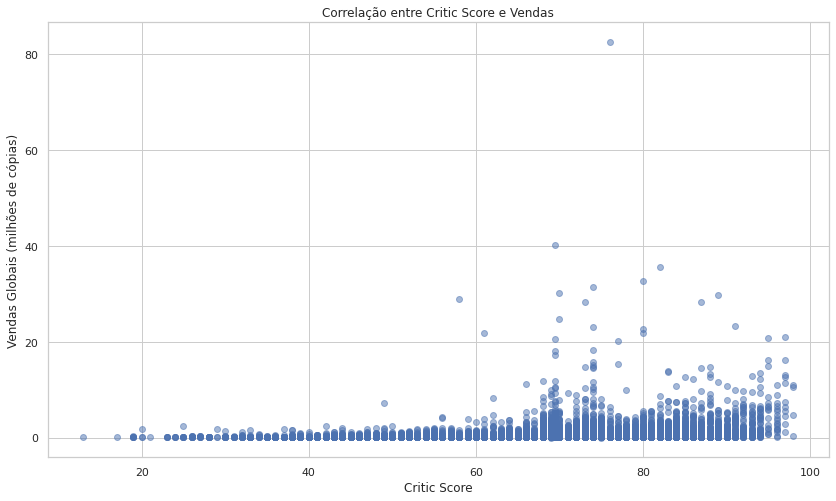

In [190]:
plt.figure(figsize=(14, 8))
plt.scatter(games['critic_score'], games['wrl_sales'], alpha=0.5)
plt.title('Correlação entre Critic Score e Vendas')
plt.xlabel('Critic Score')
plt.ylabel('Vendas Globais (milhões de cópias)')
plt.grid(True)

plt.show()

A correlação positiva de 0.196 sugere uma relação fraca entre a avaliação crítica e as vendas de jogos, isso significa que, em média, jogos com avaliações críticas mais altas tendem a ter vendas um pouco maiores, mas a relação não é forte e o sucesso nem sempre é devido a uma boa avaliação da crítica.

#### Impacto dos Usuários 

Vamos analisar o impacto e a correlação da avaliação dos usuários com a quantidade de vendas dos jogos.

In [191]:
correlation_critic = games['user_score'].corr(games['wrl_sales'])
print("Correlação entre a avaliação dos usuários e as Vendas:", correlation_critic)

Correlação entre a avaliação dos usuários e as Vendas: 0.05500793335155251


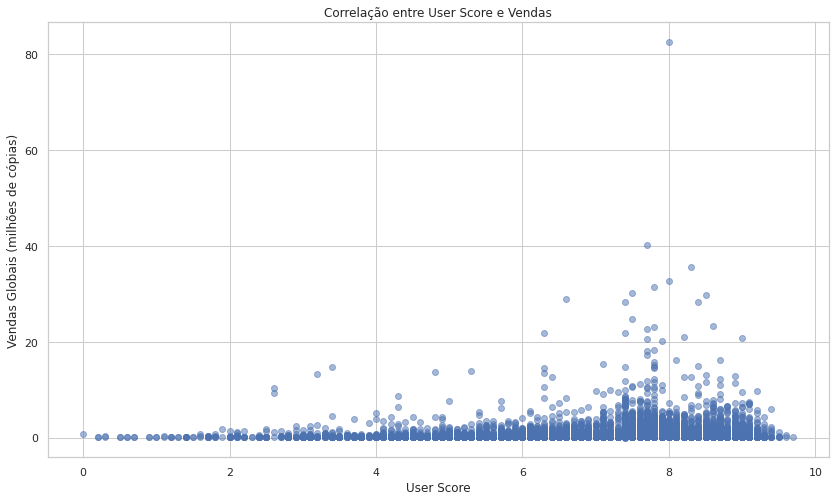

In [192]:
plt.figure(figsize=(14, 8))
plt.scatter(games['user_score'], games['wrl_sales'], alpha=0.5)
plt.title('Correlação entre User Score e Vendas')
plt.xlabel('User Score')
plt.ylabel('Vendas Globais (milhões de cópias)')
plt.grid(True)

plt.show()


A correlação positiva de 0.055 indica uma relação ainda mais fraca entre a avaliação dos usuários e as vendas de jogos. Isso significa que a avaliação dada pelos usuários não parece ter uma influência significativa nas vendas dos jogos em geral.

### Comparando as vendas de jogos em várias plataformas.

Vamos selecionar alguns jogos de forma aleatória para analisar suas vendas as plataformas onde o jogo foi lançado.

In [193]:
grouped_games = games.pivot_table(index=['wrl_sales'], values=['platform', 'name'], aggfunc=['sum'])                                       
grouped_games = grouped_games.sort_values(by='wrl_sales', ascending=False)
grouped_games.head(50)                                  

sum         
                                                   name platform
wrl_sales                                                       
82.54                                        wii sports      wii
40.24                                 super mario bros.      nes
35.52                                    mario kart wii      wii
32.77                                 wii sports resort      wii
31.38                          pokemon red/pokemon blue       gb
30.26                                            tetris       gb
29.80                             new super mario bros.       ds
28.91                                          wii play      wii
28.32                         new super mario bros. wii      wii
28.31                                         duck hunt      nes
24.67                                        nintendogs       ds
23.21                                     mario kart ds       ds
23.09                       pokemon gold/pokemon silver       gb
22.70                                           wii fit      wii
21.82                                kinect adventures!     x360
21.80                                      wii fit plus      wii
21.05                                grand theft auto v      ps3
20.81                     grand theft auto: san andreas      ps2
20.62                                 super mario world     snes
20.14      brain age: train your brain in minutes a day       ds
18.24                     pokemon diamond/pokemon pearl       ds
18.14                                  super mario land       gb
17.28                               super mario bros. 3      nes
16.27                                grand theft auto v     x360
16.15                       grand theft auto: vice city      ps2
15.84                     pokemon ruby/pokemon sapphire      gba
15.28       brain age 2: more training in minutes a day       ds
15.13                       pokemon black/pokemon white       ds
14.97                            gran turismo 3: a-spec      ps2
14.73                    call of duty: modern warfare 3     x360
14.64           pokémon yellow: special pikachu edition       gb
14.63                         call of duty: black ops 3      ps4
14.62                           call of duty: black ops     x360
14.60                               pokemon x/pokemon y      3ds
13.79                        call of duty: black ops ii      ps3
13.68                        call of duty: black ops ii     x360
13.47                    call of duty: modern warfare 2     x360
13.33                    call of duty: modern warfare 3      ps3
13.10                              grand theft auto iii      ps2
12.84                           super smash bros. brawl      wii
12.65                                      mario kart 7      3ds
12.63                           call of duty: black ops      ps3
12.62                                grand theft auto v      ps4
12.14                       animal crossing: wild world       ds
12.12                                            halo 3     x360
11.90                                    super mario 64      n64
11.77              pokemon heartgold/pokemon soulsilver       ds
11.68         pokemon omega ruby/pokemon alpha sapphire      3ds
11.65                                    gran turismo 4      ps2
11.35                                super mario galaxy      wii

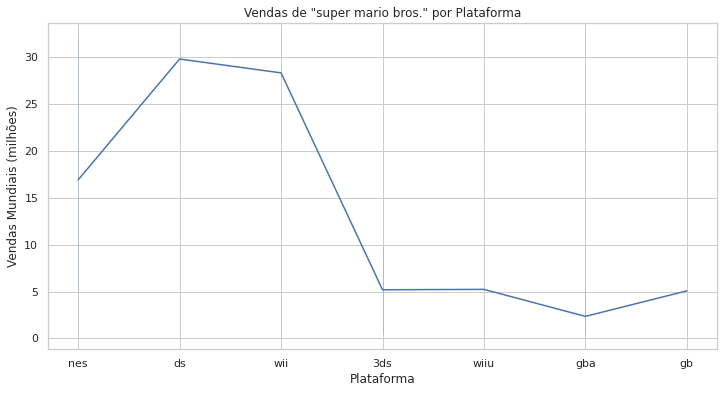

In [194]:
game_name = "super mario bros."
game_data = games[games['name'].str.contains(game_name, case=False)]
game_data = game_data.sort_values(by='wrl_sales', ascending=False)

plt.figure(figsize=(12, 6))
sns.lineplot(x='platform', y='wrl_sales', data=game_data)
plt.xlabel('Plataforma')
plt.ylabel('Vendas Mundiais (milhões)')
plt.title(f'Vendas de "{game_name}" por Plataforma')
plt.show()

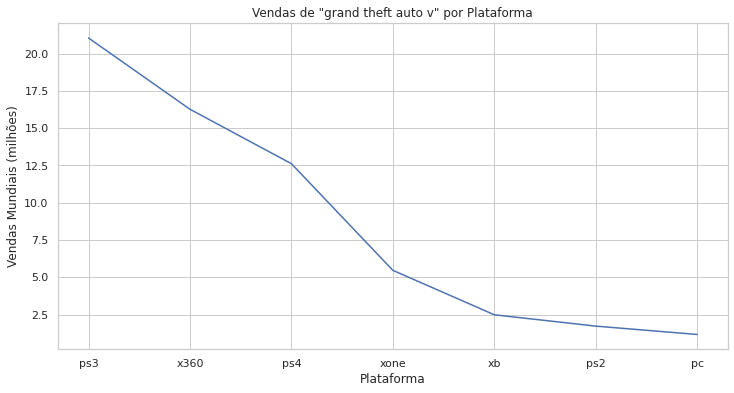

In [195]:
game_name = "grand theft auto v"
game_data = games[games['name'].str.contains(game_name, case=False)]
game_data = game_data.sort_values(by='wrl_sales', ascending=False)

plt.figure(figsize=(12, 6))
sns.lineplot(x='platform', y='wrl_sales', data=game_data)
plt.xlabel('Plataforma')
plt.ylabel('Vendas Mundiais (milhões)')
plt.title(f'Vendas de "{game_name}" por Plataforma')
plt.show()

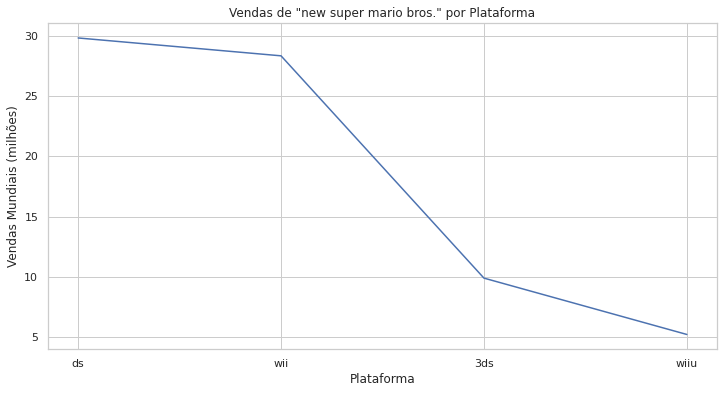

In [196]:
game_name = "new super mario bros."
game_data = games[games['name'].str.contains(game_name, case=False)]
game_data = game_data.sort_values(by='wrl_sales', ascending=False)

plt.figure(figsize=(12, 6))
sns.lineplot(x='platform', y='wrl_sales', data=game_data)
plt.xlabel('Plataforma')
plt.ylabel('Vendas Mundiais (milhões)')
plt.title(f'Vendas de "{game_name}" por Plataforma')
plt.show()

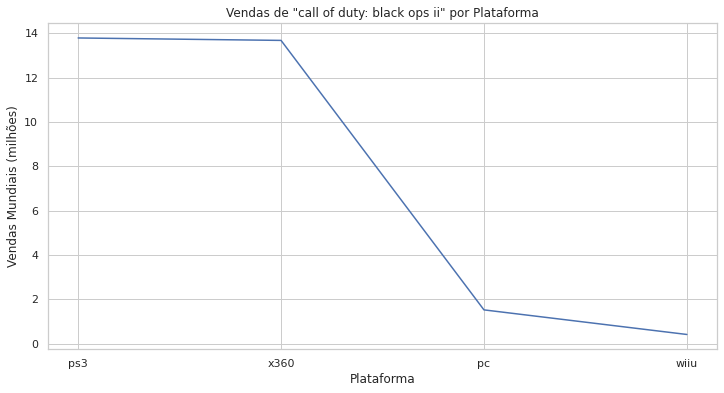

In [197]:
game_name = "call of duty: black ops ii"
game_data = games[games['name'].str.contains(game_name, case=False)]
game_data = game_data.sort_values(by='wrl_sales', ascending=False)

plt.figure(figsize=(12, 6))
sns.lineplot(x='platform', y='wrl_sales', data=game_data)
plt.xlabel('Plataforma')
plt.ylabel('Vendas Mundiais (milhões)')
plt.title(f'Vendas de "{game_name}" por Plataforma')
plt.show()

Analisando esses 4 jogos que comparamos suas vendas em diversas plataformas, podemos notar que a quantidade de vendas acontece em plataformas especificas indicando que há uma certa diferença no perfil de jogo entre os usuários que jogam ps3 e x360 e usuários que jogam wii e ds.

### Jogos por Gênero

In [198]:
games_genre = games.groupby('genre')['wrl_sales'].sum()

games_genre

genre
Action          1716.87
Adventure        233.33
Fighting         445.66
Misc             790.29
Platform         825.55
Puzzle           239.89
Racing           724.80
Role-Playing     931.08
Shooter         1041.36
Simulation       387.96
Sports          1321.35
Strategy         172.57
Name: wrl_sales, dtype: float64

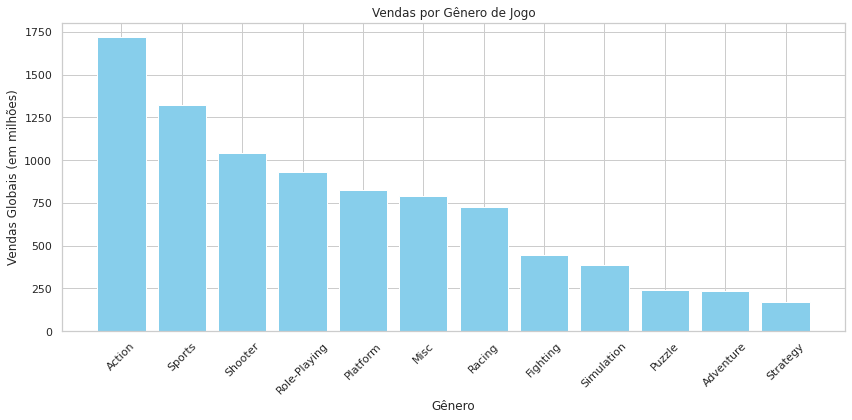

In [199]:
games_genre = games_genre.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(games_genre.index, games_genre.values, color='skyblue')
plt.title('Vendas por Gênero de Jogo')
plt.xlabel('Gênero')
plt.ylabel('Vendas Globais (em milhões)')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

Analisando os valores de vendas por gênero, podemos observar o seguinte:

O gênero "Action" lidera em vendas, com um total de 1716.87 milhões, tornando-se o gênero mais lucrativo. Os gêneros "Shooter" com 1041.36 milhões e "Sports" com 1041.36 milhões também tiveram vendas altas, sendo os três gêneros mais lucrativos de todos os tempos.

Gêneros como "Adventure", "Puzzle" e "Strategy" têm vendas mais baixas em comparação com os outros gêneros, com vendas variando de 172.57 a 239.89 milhões.

No geral, os gêneros mais lucrativos são "Action", "Shooter" e "Sports", com vendas significativamente mais altas em comparação com outros gêneros. Isso sugere que jogos desses gêneros tendem a atrair mais vendas globais. Por outro lado, gêneros como "Adventure", "Puzzle" e "Strategy" têm vendas mais baixas em geral.


Generalizar que todos os jogos dos gêneros com mais vendas são um sucesso e que os jogos de gêneros com menos vendas são um fracasso é uma afirmação duvidosa pois podemos ter jogos com vendas significativas nos gêneros com menos vendas e também o contrário, podemos ter jogos com poucas vendas em gêneros com muitas vendas, mas um fato é que os gêneros com mais vendas conseguem ter a maior atenção dos usuários e ter uma alta procura para compra de jogos destes gêneros outro ponto importante que podemos analisar é que podemos ter uma alta quantidade de jogos lançados em gêneros com mais vendas assim como tivemos em relação a quantidade de jogos lançados por plataforma. 

## Criando Perfil de Usuário para cada Região

Vamos analisar o perfl dos usuarios em cada região e descobrir as plataformas que mais são utilizados e os gêneros que os usuários mais jogam em cada uma delas. 

### América do Norte

In [200]:
na_sales = games.pivot_table(index='platform', values= 'na_sales', aggfunc='sum')
na_sales = na_sales.nlargest(5, 'na_sales')
na_sales

,na_sales
platform,
x360,595.74
ps2,580.30
wii,486.87
ps3,390.13
ds,380.32


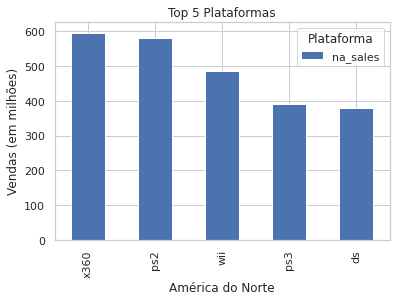

In [201]:
na_sales.plot(kind='bar')
plt.title('Top 5 Plataformas')
plt.xlabel('América do Norte')
plt.ylabel('Vendas (em milhões)')
plt.xticks()
plt.legend(title='Plataforma')
plt.show()

In [202]:
genre_na = games.pivot_table(index='genre', values= 'na_sales', aggfunc='sum')
genre_na = genre_na.nlargest(5, 'na_sales')
genre_na

,na_sales
genre,
Action,863.23
Sports,677.65
Shooter,584.83
Platform,444.44
Misc,399.57


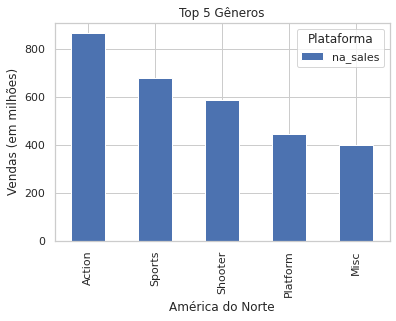

In [203]:
genre_na.plot(kind='bar')
plt.title('Top 5 Gêneros')
plt.xlabel('América do Norte')
plt.ylabel('Vendas (em milhões)')
plt.xticks()
plt.legend(title='Plataforma')
plt.show()

### Europa

In [204]:
euro_sales = games.pivot_table(index='platform', values= 'eu_sales', aggfunc='sum')
euro_sales = euro_sales.nlargest(5, 'eu_sales')
euro_sales

,eu_sales
platform,
ps2,337.00
ps3,327.21
x360,268.37
wii,258.32
ps,212.39


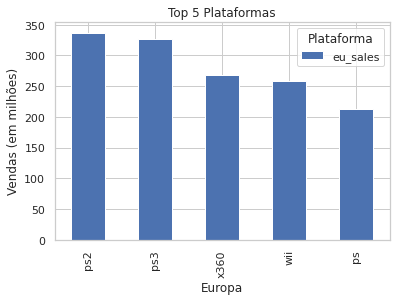

In [205]:
euro_sales.plot(kind='bar')
plt.title('Top 5 Plataformas')
plt.xlabel('Europa')
plt.ylabel('Vendas (em milhões)')
plt.xticks()
plt.legend(title='Plataforma')
plt.show()

In [206]:
genre_eu = games.pivot_table(index='genre', values= 'eu_sales', aggfunc='sum')
genre_eu = genre_eu.nlargest(5, 'eu_sales')
genre_eu

,eu_sales
genre,
Action,511.24
Sports,374.71
Shooter,314.52
Racing,234.99
Misc,210.60


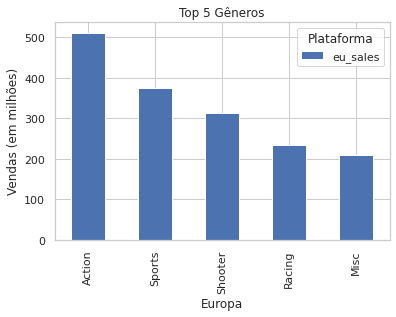

In [207]:
genre_eu.plot(kind='bar')
plt.title('Top 5 Gêneros')
plt.xlabel('Europa')
plt.ylabel('Vendas (em milhões)')
plt.xticks()
plt.legend(title='Plataforma')
plt.show()

### Japão

In [208]:
japan = games.pivot_table(index='platform', values= 'jp_sales', aggfunc='sum')
japan = japan.nlargest(5, 'jp_sales')
japan

,jp_sales
platform,
ds,175.02
ps,139.78
ps2,137.63
snes,116.55
3ds,100.62


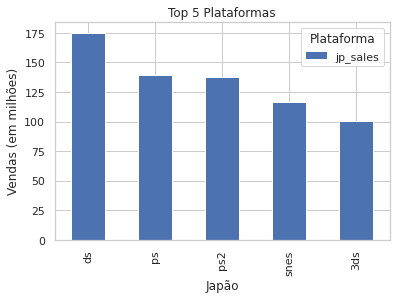

In [209]:
japan.plot(kind='bar')
plt.title('Top 5 Plataformas')
plt.xlabel('Japão')
plt.ylabel('Vendas (em milhões)')
plt.xticks()
plt.legend(title='Plataforma')
plt.show()

In [210]:
genre_jp = games.pivot_table(index='genre', values= 'jp_sales', aggfunc='sum')
genre_jp = genre_jp.nlargest(5, 'jp_sales')
genre_jp

,jp_sales
genre,
Role-Playing,353.39
Action,160.14
Sports,135.24
Platform,130.71
Misc,107.02


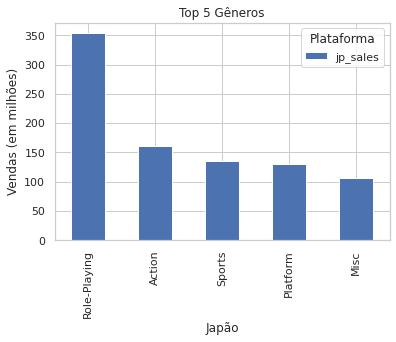

In [211]:
genre_jp.plot(kind='bar')
plt.title('Top 5 Gêneros')
plt.xlabel('Japão')
plt.ylabel('Vendas (em milhões)')
plt.xticks()
plt.legend(title='Plataforma')
plt.show()

### Top 5 Plataformas por Região

In [212]:
top_platforms = pd.concat([na_sales, euro_sales, japan], axis=1)
top_platforms.columns = ['na_Sales', 'eu_Sales', 'jp_Sales']

top_platforms

,na_Sales,eu_Sales,jp_Sales
platform,,,
x360,595.74,268.37,NaN
ps2,580.30,337.00,137.63
wii,486.87,258.32,NaN
ps3,390.13,327.21,NaN
ds,380.32,NaN,175.02
ps,NaN,212.39,139.78
snes,NaN,NaN,116.55
3ds,NaN,NaN,100.62


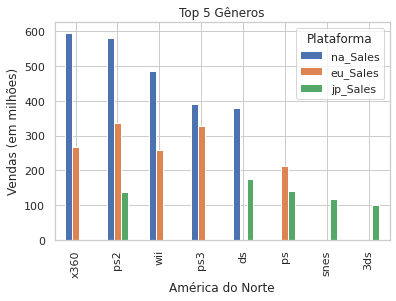

In [213]:
top_platforms.plot(kind='bar')
plt.title('Top 5 Gêneros')
plt.xlabel('América do Norte')
plt.ylabel('Vendas (em milhões)')
plt.xticks()
plt.legend(title='Plataforma')
plt.show()

Com base nos dados das cinco principais plataformas e suas vendas nas regiões da América do Norte (NA), Europa (EU) e Japão (JP), podemos fazer as seguintes observações:

x360: É a plataforma líder em vendas na América do Norte (NA Sales: 595.74 milhões) e também tem vendas significativas na Europa (EU Sales: 268.37 milhões). No entanto, não figura no top 5 do Japão.

ps2: Tem vendas expressivas na América do Norte (NA Sales: 580.30 milhões) e Europa (EU Sales: 337.00 milhões). No Japão, também possui boas vendas (JP Sales: 137.63 milhões).

wii: Lidera as vendas na Europa (EU Sales: 258.32 milhões) e tem vendas consideráveis na América do Norte (NA Sales: 486.87 milhões), e não está entre o top 5 no Japão. 

ps3: Tem vendas substanciais na Europa (EU Sales: 327.21 milhões) e América do Norte (NA Sales: 390.13 milhões), assim como a Wii, não possui vendas registradas no Japão.

ds: É a única plataforma nas cinco principais com vendas consideráveis no Japão (JP Sales: 175.02 milhões). Não possui vendas registradas na América do Norte e na Europa.

Outro ponto é que snes 116.55 milhões e 3ds	100.62 milhões e 3ds estão no top 5 do Japão que são plataformas que não estão América do Norte e na Europa.

É importante notar que algumas plataformas têm vendas significativas em uma região específica, enquanto outras podem ser populares em várias regiões. As diferenças nas quotas de mercado entre as regiões podem ser atribuídas a fatores como preferências do público, estratégias de marketing e entre outros fatores.


### Top 5 Gêneros por Região

In [214]:
top_genres = pd.concat([genre_na, genre_eu, genre_jp], axis=1)
top_genres.columns = ['na_genre', 'eu_genre', 'jp_genre']

top_genres

,na_genre,eu_genre,jp_genre
genre,,,
Action,863.23,511.24,160.14
Sports,677.65,374.71,135.24
Shooter,584.83,314.52,NaN
Platform,444.44,NaN,130.71
Misc,399.57,210.60,107.02
Racing,NaN,234.99,NaN
Role-Playing,NaN,NaN,353.39


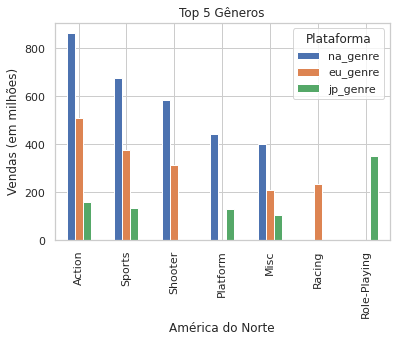

In [215]:
top_genres.plot(kind='bar')
plt.title('Top 5 Gêneros')
plt.xlabel('América do Norte')
plt.ylabel('Vendas (em milhões)')
plt.xticks()
plt.legend(title='Plataforma')
plt.show()

Analisando os top 5 gêneros em cada região podemos fazer as seguintes observações:

Gênero "Action": lidera as vendas na América do Norte (NA Sales: 863.23 milhões) e na Europa (EU Sales: 511.24 milhões), no Japão, também tem vendas consideráveis (JP Sales: 160.14 milhões) e é o gênero mais popular globalmente entre os cinco principais.

Gênero "Sports": tem vendas significativas na América do Norte (NA Sales: 677.65 milhões) e na Europa (EU Sales: 374.71 milhões), no Japão, também possui vendas consideráveis (JP Sales: 135.24 milhões).

Gênero "Shooter": lidera as vendas na América do Norte (NA Sales: 584.83 milhões) e tem vendas consideráveis na Europa (EU Sales: 314.52 milhões), não possui vendas registradas no Japão.

Gênero "Platform": tem vendas significativas na América do Norte (NA Sales: 444.44 milhões) não possui vendas registradas na Europa e no Japão, também possui vendas consideráveis (JP Sales: 130.71 milhões).

Gênero "Misc": tem vendas na América do Norte (NA Sales: 399.57 milhões) e na Europa (EU Sales: 210.60 milhões) no Japão, também possui vendas, mas em menor quantidade (JP Sales: 107.02 milhões).

Notável é a preferência pelo gênero "Action" nas regiões da América do Norte e Europa, onde lidera as vendas em ambas "Sports" também é popular nessas duas regiões. Por outro lado, o Japão demonstra um gosto notável por jogos de "Role-Playing" (JP Sales: 353.39 milhões), que lidera em vendas nessa região mostrando um grande interesse por parte dos usuários por jogos deste gênero. 

As diferenças nas preferências de gênero entre as regiões podem ser influenciadas pelas culturas de jogo locais, preferências do público e lançamentos específicos para cada região, essas variações podem ser importantes para as estratégias de marketing e desenvolvimento de jogos.

No geral podemos notar que os mercados da América do Norte e Europa são de certa forma "semelhantes" tanto nas plataformas como nos gêneros com mais vendas, já o Japão tem um mercado com um perfil diferente de usuários tanto nas plataformas como nos gêneros de jogos. 

### ESBR

In [216]:
rating = games.groupby(['rating'])[['na_sales', 'eu_sales', 'jp_sales']].sum().reset_index()

rating

,rating,na_sales,eu_sales,jp_sales
0,AO,1.26,0.61,0.00
1,E,1281.23,707.37,198.01
2,E10+,345.51,183.35,40.20
3,EC,1.53,0.11,0.00
4,K-A,2.56,0.27,1.46
5,M,742.95,480.25,63.58
6,RP,1227.46,611.08,837.04
7,T,747.60,421.79,150.70


Podemos observar algumas diferenças nas vendas de jogos com diferentes classificações do ESRB em regiões individuais:

AO (Adults Only): Esta classificação tem vendas relativamente baixas em todas as regiões, especialmente no Japão, onde não há vendas registradas para jogos com essa classificação.

E (Everyone): A classificação "E" tem vendas significativas em todas as regiões, sendo mais alta na América do Norte (NA) em comparação com as outras regiões.

E10+ (Everyone 10 and older): Essa classificação também possui vendas razoáveis em todas as regiões, mas novamente é mais alta na América do Norte.

EC (Early Childhood): A classificação "EC" tem vendas muito baixas em todas as regiões, especialmente na Europa (EU).

K-A (Kids to Adults): A classificação "K-A" tem vendas moderadas na América do Norte e Japão, mas baixas na Europa.

M (Mature): A classificação "M" tem vendas consideráveis na América do Norte, mas vendas mais baixas na Europa e no Japão.

RP (Rating Pending): A classificação "RP" (Classificação Pendente) tem vendas relativamente altas em todas as regiões, com destaque para a América do Norte.

T (Teen): A classificação "T" tem vendas significativas em todas as regiões, sendo mais alta na América do Norte.

Com base nessas observações, podemos concluir que as classificações do ESRB têm influência nas vendas em regiões individuais. Por exemplo, jogos com classificação "E" (Everyone) tendem a vender bem na América do Norte, enquanto jogos com classificação "M" (Mature) têm vendas mais fortes nessa região em comparação com outras. No entanto, a influência exata pode variar de acordo com outros fatores, como o conteúdo específico do jogo, a popularidade da plataforma, a alta quantidade de jogos com a classificação Pendente em (RP) pode ser devido a não necessidade de classificação em algumas regiões  ou por erro no preenchimento das informações.

## Testando Hipoteses

###  As classificações médias dos usuários das plataformas Xbox One e PC

Vamos analisar se a média dos usuários das plataforma xone e pc.

Hipotese Nula (H0): As classificações médias dos usuários nas plataformas Xbox One e PC são iguais.

Hipotese Alternativa (H1): As classificações médias dos usuários nas plataformas Xbox One e PC não são iguais.


In [217]:
import scipy.stats as stats

xone = games[games['platform'] == 'xone']['user_score']
pc = games[games['platform'] == 'pc']['user_score']

mean_xone = xone.mean()
mean_pc = pc.mean()

variance_xone = xone.var()
variance_pc = pc.var()

print(f"Média das classificações dos usuários para Xbox One: {mean_xone}")
print(f"Média das classificações dos usuários para PC: {mean_pc}")
print(f"Variância das classificações dos usuários para Xbox One: {variance_xone}")
print(f"Variância das classificações dos usuários para PC: {variance_pc}")

Média das classificações dos usuários para Xbox One: 6.7615384615384615
Média das classificações dos usuários para PC: 7.166492693110647
Variância das classificações dos usuários para Xbox One: 1.5727829893683556
Variância das classificações dos usuários para PC: 1.898301374554704


As médias indicam que, em média, as classificações dos usuários para PC são um pouco mais altas do que as classificações para Xbox One.

As variâncias indicam a dispersão dos dados. A variância para PC é um pouco maior do que a variância para Xbox One, o que sugere que as classificações dos usuários para PC podem variar um pouco mais.

Para realizar o teste t, utilizarei um nível de significância de 0.05.

In [218]:
import scipy.stats as stats

alpha = 0.05

_, p_value_var = stats.levene(xone, pc)

if p_value_var < alpha:
    equal_var = False
else:
    equal_var = True

results = stats.ttest_ind(xone, pc, equal_var=equal_var)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("Rejeitamos a hipótese nula. As médias são estatisticamente diferentes.")
else:
    print("Não temos evidências para rejeitar a hipótese nula. As médias são estatisticamente iguais.")

p-value: 2.9562320013987998e-05
Rejeitamos a hipótese nula. As médias são estatisticamente diferentes.


### As classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) são diferentes.

Vamos analisar se as médias dos usuários dos gêneros 'action' e 'sport' são diferentes.

Hipótese Nula (H0): As classificações médias de usuários para os gêneros "Action" e "Sports" são iguais.

Hipótese Alternativa (H1): As classificações médias de usuários para os gêneros "Action" e "Sports" são diferentes.



In [219]:
import scipy.stats as stats

sports = games.query('genre == "Sports"')['user_score']
action = games.query('genre == "Action"')['user_score']

mean_action = action.mean()
mean_sports = sports.mean()

variance_action = action.var()
variance_sports = sports.var()

print(f"Média das classificações dos usuários do gênerio Action: {mean_action}")
print(f"Média das classificações dos usuários do gênerio Sports: {mean_sports}")
print(f"Variância das classificações dos usuários do gênerio Action: {variance_action}")
print(f"Variância das classificações dos usuários gênerio Sports: {variance_sports}")

Média das classificações dos usuários do gênerio Action: 7.2147218863361555
Média das classificações dos usuários do gênerio Sports: 7.193226919758413
Variância das classificações dos usuários do gênerio Action: 1.1300009205126789
Variância das classificações dos usuários gênerio Sports: 1.2775156075270642


Em média os jogos do gênero "Action" podem ter classificações ligeiramente mais altas por parte dos usuários em comparação com os jogos do gênero "Sports". No entanto, as diferenças são relativamente pequenas.

A variância indica que as classificações dos usuários para o gênero "Sports" têm uma variabilidade um pouco maior em relação às classificações dos usuários para o gênero "Action". 

Hipótese Nula (H0): As médias das classificações dos usuários para os gêneros "Action" e "Sports" são iguais.

Hipótese Alternativa (H1): As médias das classificações dos usuários para os gêneros "Action" e "Sports" são diferentes.

Para realizar o teste t, utilizarei um nível de significância de 0.05.

In [220]:

import scipy.stats as stats

alpha = 0.05

_, p_value_var = stats.levene(sports, action)

if p_value_var < alpha:
    equal_var = False
else:
    equal_var = True

results = stats.ttest_ind(sports, action, equal_var=equal_var)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("Rejeitamos a hipótese nula. As médias são estatisticamente diferentes.")
else:
    print("Não temos evidências para rejeitar a hipótese nula. As médias são estatisticamente iguais.")

p-value: 0.46712580474601406
Não temos evidências para rejeitar a hipótese nula. As médias são estatisticamente iguais.


## Conclusão Geral

Realizamos análise de dados de vendas de jogos, realizamos diversas etapas para explorar, analisar e tirar insights dos dados.

Entendimento dos Dados: Iniciamos pelo entendimento dos dados, verificando as informações básicas, como tamanho do conjunto de dados, colunas disponíveis e valores ausentes.

Limpeza e Preparação de Dados: Identificamos e lidamos com dados faltantes, tratamos tipos de dados, renomeamos colunas e realizamos outros procedimentos de limpeza para garantir que os dados estivessem prontos para análise.

Exploração de Dados: Utilizamos várias técnicas de exploração de dados, como visualizações gráficas e estatísticas descritivas, para obter insights sobre as vendas de jogos em diferentes regiões, plataformas, gêneros e classificações.  Criamos gráficos adequados para visualizar as vendas em diferentes contextos, como vendas por plataforma, gênero ou região. Isso ajudou na comunicação eficaz de insights.

Descobertas: Descobrimos que em média as plataformas ficam ativas entre 8 a 10 anos em média e que seu auge de vendas pode durar de 4 a 7 anos em média, e que a correlações de vendas e avaliação da crítica não é alta mostrando que nem sempre o sucesso em vendas vem de uma ótima avaliação da crítica e que as avaliações dos usuários também não tem um impacto direto nas vendas de um jogo. Descobrimos também que tivemos grandes volumes de vendas entre 2005 a 2010 com uma alta quantidade de vendas e de jogos lançados porém a média de vendas por jogo é baixa em comparação com plataformas mais antigas mostrando que a alta quantidade de lançamentos pode impactar em mais vendas para uma plataformas mas que isso não significa sucesso para os jogos pois temos muitos jogos com vendas baixas ou nenhuma em um periodo onde as vendas atingiram seu auge e do outro lado podemos notar que as plataformas antigas tinham uma quantidade de lançamentos muito inferior em cada plataforma porém um valor média alto de vendas por jogo lançado e isso pode ter sido pela falta de modernidade e dificuldade de criar jogos com a mesma frequência que houve em plataformas lançadas após os anos 2000. Outro ponto importante é que temos plataformas diferentes no Japão no Top 5 em comparação com a Europa e a América do Norte e nos gêneros de jogos também temos essa diferença. 

Nível de Significância: Comentamos sobre o nível de significância, que é uma escolha crítica ao realizar testes de hipóteses. Um nível de significância padrão é 0.05 (5%).

Testes de Hipóteses: Realizamos testes estatísticos, como o teste t de duas amostras independentes, para investigar se as diferenças nas médias de classificações dos usuários entre diferentes grupos eram estatisticamente significativas. Isso incluiu testes para verificar se as médias de classificações eram iguais entre gêneros de jogos e entre plataformas.

Conclusões: Com base nos resultados de análise e testes estatísticos, chegamos a várias conclusões, incluindo que as classificações do ESRB não parecem ter um impacto significativo nas vendas por região, que não encontramos diferenças significativas nas médias de classificações dos usuários entre gêneros Action e Sports, e que as médias de classificações dos usuários entre as plataformas Xbox One e PC são estatisticamente diferentes.